In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

**Data Overview/Cleaning**

In [2]:
p3=pd.read_csv('HR-Employee-Attrition.csv')
p3.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [3]:
#getting data information
p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#checking for empty cells
p3.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
#Deleting redundant columns
p3.drop(['YearsWithCurrManager','YearsSinceLastPromotion','WorkLifeBalance', 'TrainingTimesLastYear', 'StockOptionLevel', 'Over18', 'EmployeeCount','JobInvolvement', 'EnvironmentSatisfaction', 'PercentSalaryHike', 'YearsInCurrentRole', 'YearsAtCompany', 'StandardHours','PercentSalaryHike', 'MonthlyRate','HourlyRate', 'DailyRate'], axis=1, inplace=True)
p3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobLevel                  1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MaritalStatus             1470 non-null   object
 13  MonthlyIncome             1470 non-null   int64 
 14  NumCompaniesWorked      

In [6]:
#Renaming the columns
column_mapping = {
    'BusinessTravel': 'Business Travel',
    'DistanceFromHome': 'Distance From Home',
    'Education': 'Education Level',
    'EducationField': 'Education Field',
    'EmployeeNumber': 'Employee Number',
    'JobLevel': 'Job Level',
    'JobRole': 'Job Role',
    'JobSatisfaction': 'Job Satisfaction',
    'MaritalStatus': 'Marital Status',
    'MonthlyIncome': 'Monthly Income',
    'NumCompaniesWorked': 'Number of Companies Worked',
    'OverTime': 'Over Time',
    'PerformanceRating': 'Performance Rating',
    'RelationshipSatisfaction': 'Relationship Satisfaction',
    'TotalWorkingYears': 'Total Working Years',
}
p3.rename(columns=column_mapping, inplace=True)
p3

,Age,Attrition,Business Travel,Department,Distance From Home,Education Level,Education Field,Employee Number,Gender,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Number of Companies Worked,Over Time,Performance Rating,Relationship Satisfaction,Total Working Years
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,Female,2,Sales Executive,4,Single,5993,8,Yes,3,1,8
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,Male,2,Research Scientist,2,Married,5130,1,No,4,4,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,Laboratory Technician,3,Single,2090,6,Yes,3,2,7
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,Female,1,Research Scientist,3,Married,2909,1,Yes,3,3,8
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,Male,1,Laboratory Technician,2,Married,3468,9,No,3,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,Male,2,Laboratory Technician,4,Married,2571,4,No,3,3,17
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,Male,3,Healthcare Representative,1,Married,9991,4,No,3,1,9
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,Male,2,Manufacturing Director,2,Married,6142,1,Yes,4,2,6
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,Male,2,Sales Executive,2,Married,5390,2,No,3,4,17


In [7]:
#Dropping duplicates
duplicates = p3[p3.duplicated(keep='first', subset=None)]
p3.drop_duplicates(keep='first', inplace=True)
p3.head(10)

,Age,Attrition,Business Travel,Department,Distance From Home,Education Level,Education Field,Employee Number,Gender,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Number of Companies Worked,Over Time,Performance Rating,Relationship Satisfaction,Total Working Years
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,Female,2,Sales Executive,4,Single,5993,8,Yes,3,1,8
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,Male,2,Research Scientist,2,Married,5130,1,No,4,4,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,Laboratory Technician,3,Single,2090,6,Yes,3,2,7
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,Female,1,Research Scientist,3,Married,2909,1,Yes,3,3,8
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,Male,1,Laboratory Technician,2,Married,3468,9,No,3,4,6
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,8,Male,1,Laboratory Technician,4,Single,3068,0,No,3,3,8
6,59,No,Travel_Rarely,Research & Development,3,3,Medical,10,Female,1,Laboratory Technician,1,Married,2670,4,Yes,4,1,12
7,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,11,Male,1,Laboratory Technician,3,Divorced,2693,1,No,4,2,1
8,38,No,Travel_Frequently,Research & Development,23,3,Life Sciences,12,Male,3,Manufacturing Director,3,Single,9526,0,No,4,2,10
9,36,No,Travel_Rarely,Research & Development,27,3,Medical,13,Male,2,Healthcare Representative,3,Married,5237,6,No,3,2,17


In [8]:
#Remove the NaN values from the dataset
p3.dropna(inplace=True)
p3.head(10)

,Age,Attrition,Business Travel,Department,Distance From Home,Education Level,Education Field,Employee Number,Gender,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Number of Companies Worked,Over Time,Performance Rating,Relationship Satisfaction,Total Working Years
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,Female,2,Sales Executive,4,Single,5993,8,Yes,3,1,8
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,Male,2,Research Scientist,2,Married,5130,1,No,4,4,10
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,1,Laboratory Technician,3,Single,2090,6,Yes,3,2,7
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,Female,1,Research Scientist,3,Married,2909,1,Yes,3,3,8
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,Male,1,Laboratory Technician,2,Married,3468,9,No,3,4,6
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,8,Male,1,Laboratory Technician,4,Single,3068,0,No,3,3,8
6,59,No,Travel_Rarely,Research & Development,3,3,Medical,10,Female,1,Laboratory Technician,1,Married,2670,4,Yes,4,1,12
7,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,11,Male,1,Laboratory Technician,3,Divorced,2693,1,No,4,2,1
8,38,No,Travel_Frequently,Research & Development,23,3,Life Sciences,12,Male,3,Manufacturing Director,3,Single,9526,0,No,4,2,10
9,36,No,Travel_Rarely,Research & Development,27,3,Medical,13,Male,2,Healthcare Representative,3,Married,5237,6,No,3,2,17


**Data Visualization**

In [9]:
correlation_matrix = p3.corr()

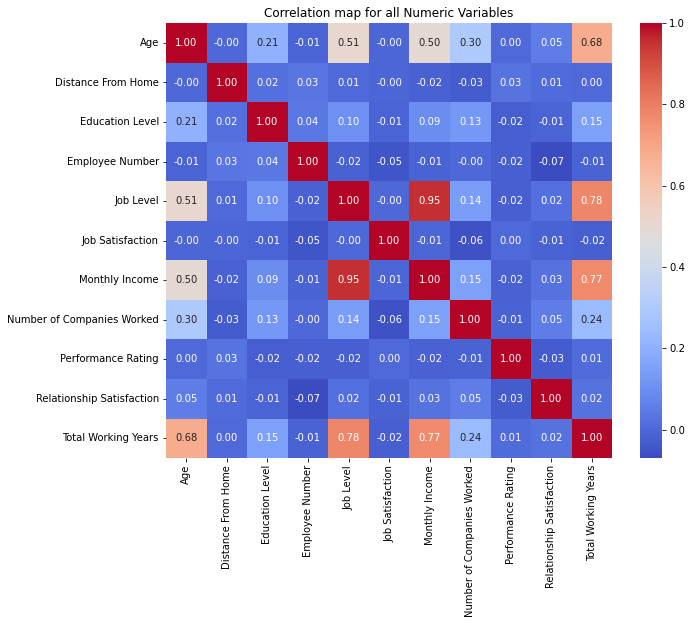

In [10]:
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation map for all Numeric Variables")
plt.show()

<AxesSubplot:xlabel='Attrition', ylabel='count'>

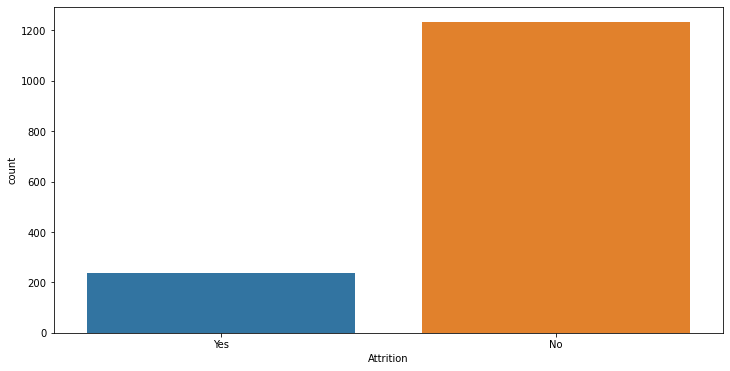

In [24]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Attrition')

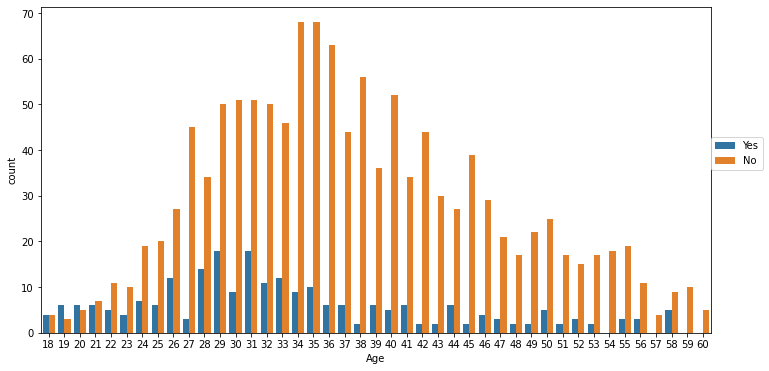

In [25]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Age',hue='Attrition')
plt.legend(loc=(1.0,0.5))

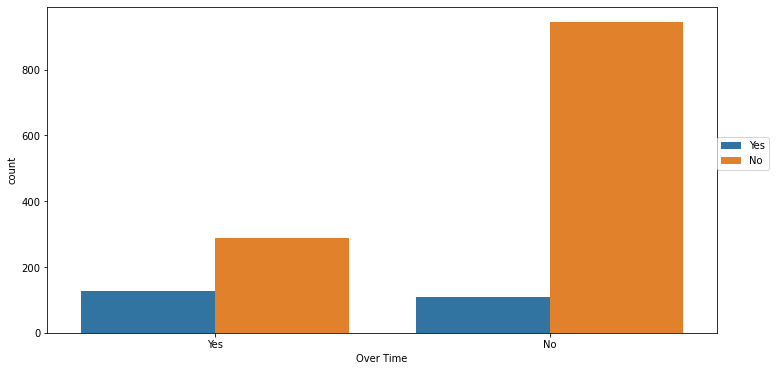

In [12]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Over Time',hue='Attrition')
plt.legend(loc=(1.0,0.5))

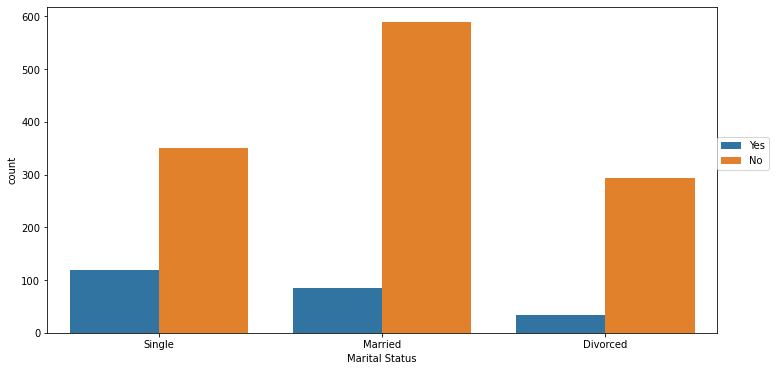

In [13]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Marital Status',hue='Attrition')
plt.legend(loc=(1.0,0.5))

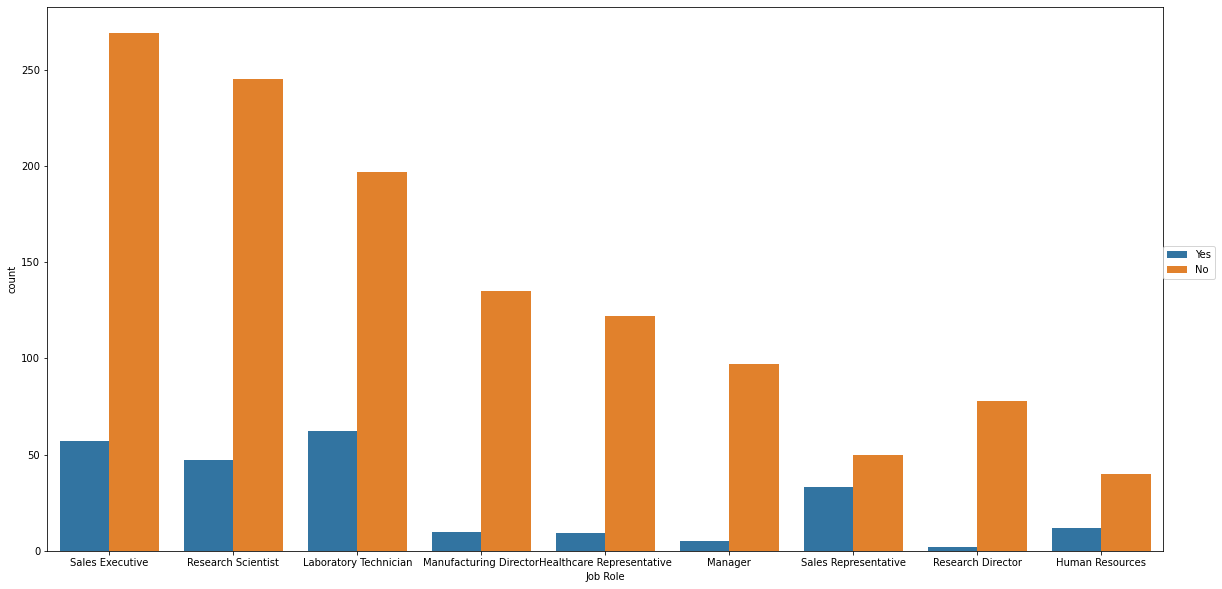

In [14]:
plt.figure(figsize=(20,10))
sb.countplot(data=p3,x='Job Role',hue='Attrition')
plt.legend(loc=(1.0,0.5))

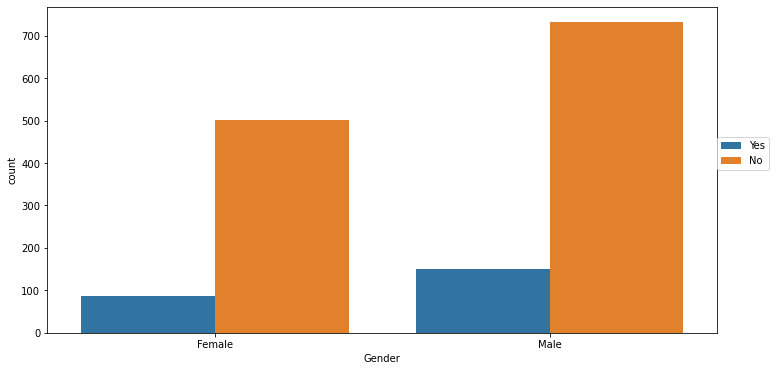

In [15]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Gender',hue='Attrition')
plt.legend(loc=(1.0,0.5))

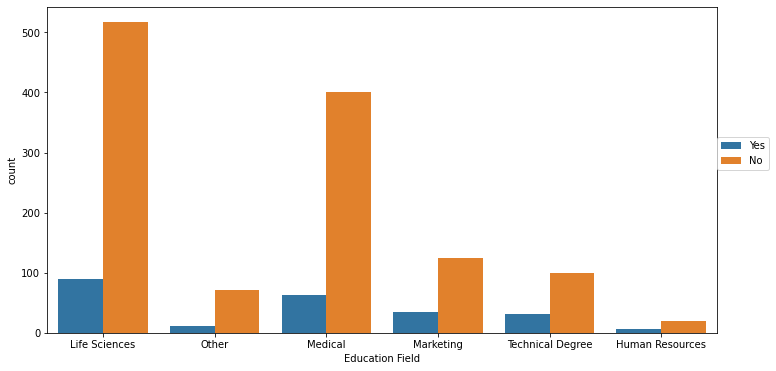

In [16]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Education Field',hue='Attrition')
plt.legend(loc=(1.0,0.5))

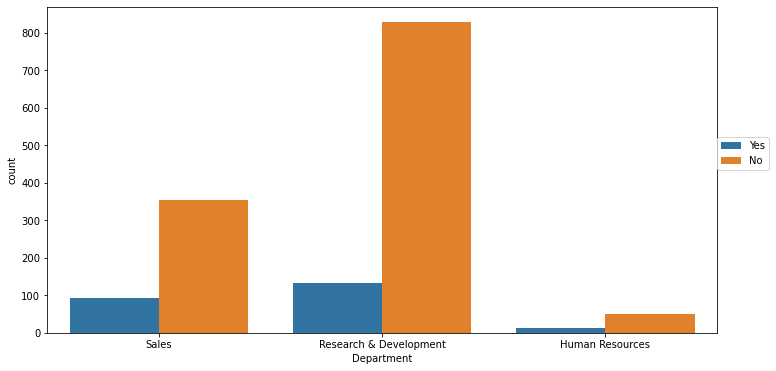

In [17]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Department',hue='Attrition')
plt.legend(loc=(1.0,0.5))

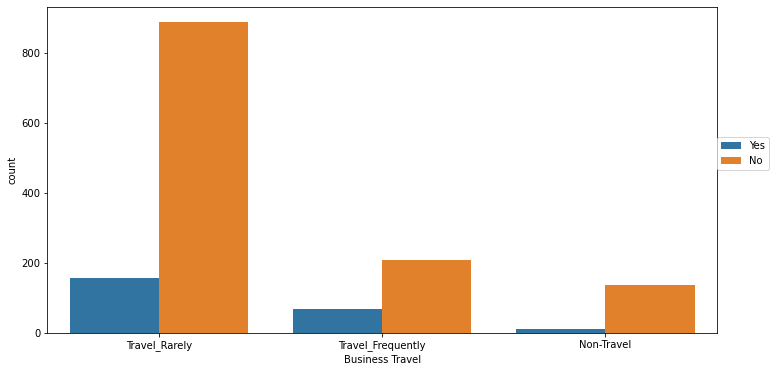

In [18]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Business Travel', hue='Attrition')
plt.legend(loc=(1.0,0.5))

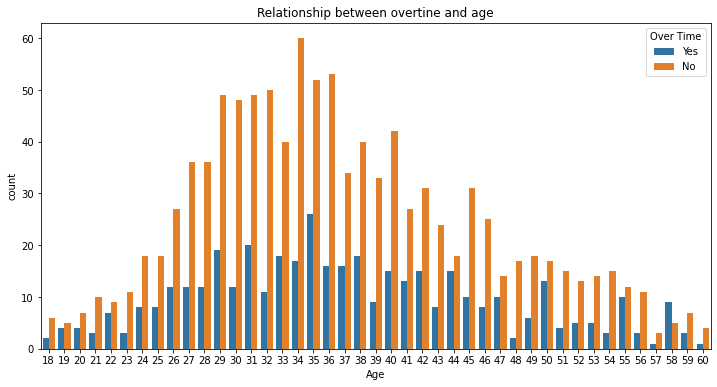

In [19]:
plt.figure(figsize=(12,6))
sb.countplot(x='Age', hue='Over Time', data=p3)
plt.title('Relationship between overtine and age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

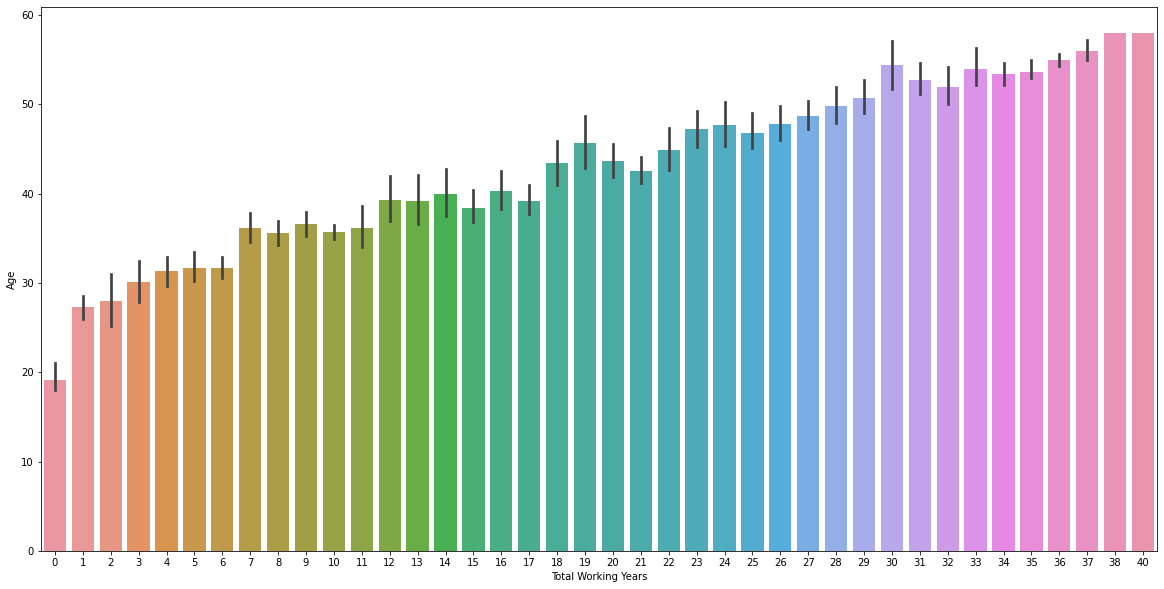

In [20]:
plt.figure(figsize=(20,10))
sb.barplot(data=p3,x='Total Working Years', y='Age')
plt.show()

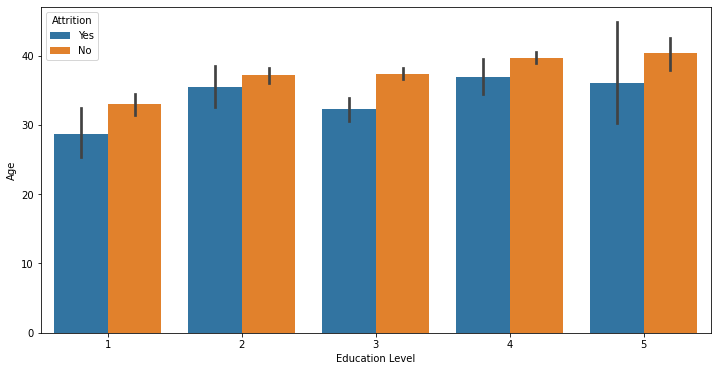

In [21]:
plt.figure(figsize=(12,6))
sb.barplot(data=p3,x='Education Level', y='Age', hue='Attrition')
plt.show()

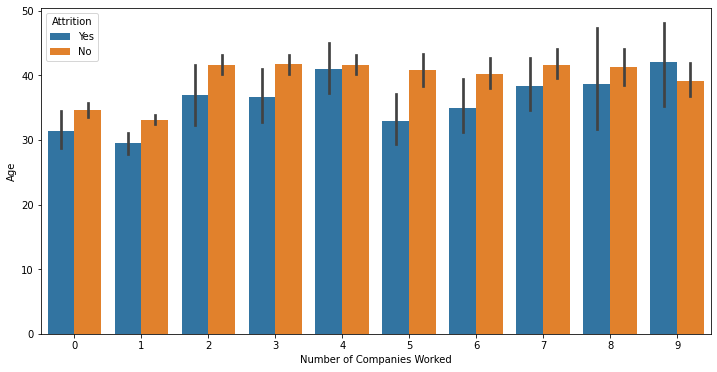

In [22]:
plt.figure(figsize=(12,6))
sb.barplot(data=p3,x='Number of Companies Worked', y='Age', hue='Attrition')
plt.show()

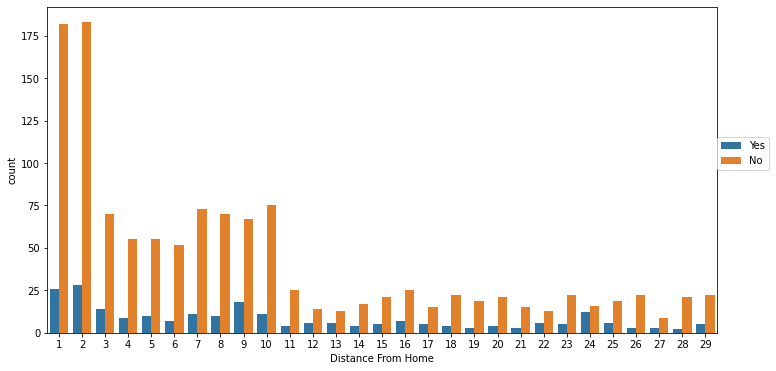

In [23]:
plt.figure(figsize=(12,6))
sb.countplot(data=p3,x='Distance From Home', hue='Attrition')
plt.legend(loc=(1.0,0.5))